<a href="https://colab.research.google.com/github/gnicoleta/colaboratory/blob/main/FML_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) WARMUPEXERCISE
> A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix


In [ ]:
import numpy as np

def WARMUPEXERCISE():
  return np.eye(5)

A = WARMUPEXERCISE()
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# 2) PLOTDATA 
Plots the data points x and y into a new figure 
<br/>PLOTDATA(x,y) plots the data points and gives the figure axes labels of population and profit.

<br/>Instructions: Plot the training data into a figure using the "figure" and "plot" commands. Set the axes labels using the "xlabel" and "ylabel" commands. Assume the population and revenue data have been passed in as the x and y arguments of this function.
<br/>
Hint: You can use the 'rx' option with plot to have the markers appear as red crosses. Furthermore, you can make the markers larger by using plot(..., 'rx', 'MarkerSize', 10);

Processed 98 lines.
[6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176, 22.203, 5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014, 11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292, 5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
[17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12.0, 6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077, 3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 

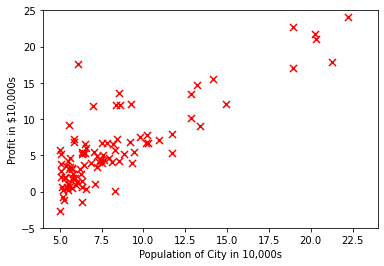

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

x_coords = [];
y_coords = [];

with open('sample_data/ex1data1.txt', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        x_coords += [float(row["x"])]
        y_coords += [float(row["y"])]
        line_count += 1
    print(f'Processed {line_count} lines.')

print(x_coords)
print(y_coords)

# Creating a numpy array
X = np.array(x_coords)
Y = np.array(y_coords)
# Plotting point using scatter method
plt.scatter(X,Y,marker ="x",c = 'red',s=50) #c si for color, s is for size
plt.axis([4, 24, -5 , 25]) #xmin, xmax, ymin, ymax
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# 3) Compute cost

In [ ]:
def computeCosts(X, Y, theta):
  m = len(Y);
  J = 0;
  sum = 0;
  for i in range(0,m):
    sum += pow(((theta[0] + theta[1]*X[i]) - Y[i]), 2);
  
  J = (1/(2*m))*sum;
  return J

print(computeCosts(x_coords, y_coords, [0,0]))

#the derivative for theta0
def derivComputeCosts0(X, Y, theta):
  m = len(Y);
  J = 0;
  sum = 0;
  for i in range(0,m):
    sum += ((theta[0] + theta[1]*X[i]) - Y[i]);
  
  J = (1/m)*sum;
  return J
#print(derivComputeCosts0(x_coords, y_coords, [0,0]))

#the derivative for theta1
def derivComputeCosts1(X, Y, theta):
  m = len(Y);
  J = 0;
  sum = 0;
  for i in range(0,m):
    sum += (((theta[0] + theta[1]*X[i]) - Y[i])*X[i]);
  
  J = (1/m)*sum;
  return J
#print(derivComputeCosts1(x_coords, y_coords, [0,0]))

32.072733877455654


# 4) Gradient descent
GRADIENTDESCENT Performs gradient descent to learn theta theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by taking num_iters gradient steps with learning rate alpha

Initialize some useful values m = length(y); % number of training examples J_history = zeros(num_iters, 1);

In [ ]:
import numpy as np

def gradientDescent(X, Y, theta, alpha, num_iters):
  m = len(Y);
  j_costs = []
  for i in range(0,num_iters):
    theta_aux = np.array(theta); #store the init values of the theta at once

    #update the values of the theta simultaneously
    theta[0] = theta[0] - alpha * derivComputeCosts0(x_coords, y_coords, theta_aux);
    theta[1] = theta[1] - alpha * derivComputeCosts1(x_coords, y_coords, theta_aux);
    #print("Initial theta values:",theta_aux)
    #print("Updated theta values:",theta)
    #print("J:",computeCosts(x_coords, y_coords, theta_aux))
    j_costs += [computeCosts(x_coords, y_coords, theta_aux)]
  return j_costs


print(gradientDescent(x_coords, y_coords, [0,0], 0.01, 15))






[32.072733877455654, 6.737190464870008, 5.931593568604957, 5.901154707081387, 5.89522858644422, 5.890094943117333, 5.885004158443646, 5.879932480491416, 5.874879094762575, 5.8698439118063845, 5.86482686531293, 5.8598278899321805, 5.85484692057229, 5.849883892376585, 5.844938740722035]


# PLOT: Training data with linear regression fit

Processed 98 lines.
[6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176, 22.203, 5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014, 11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292, 5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
[17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12.0, 6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077, 3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 

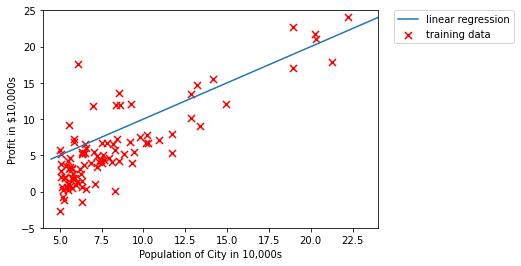

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

x_coords = [];
y_coords = [];
j_costs = [];

with open('sample_data/ex1data1.txt', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        x_coords += [float(row["x"])]
        y_coords += [float(row["y"])]
        line_count += 1
    print(f'Processed {line_count} lines.')

print(x_coords)
print(y_coords)

# Creating a numpy array
X = np.array(x_coords)
Y = np.array(y_coords)
# Plotting point using scatter method
plt.scatter(X,Y,marker ="x",c = 'red',s=50, label='training data') #c si for color, s is for size
plt.axis([4, 24, -5 , 25]) #xmin, xmax, ymin, ymax
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

j_costs = gradientDescent(x_coords, y_coords, [0,0], 0.01, 1500)
plt.plot(j_costs,j_costs,label='linear regression')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()